In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np 
from sklearn.model_selection import train_test_split
import time

### Mini MNIST

In [3]:
#  загрузим датасет рукописных цифр
digits = load_digits()

In [4]:
print("Image Data Shape" , digits["data"].shape)
print("Label Data Shape", digits["target"].shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


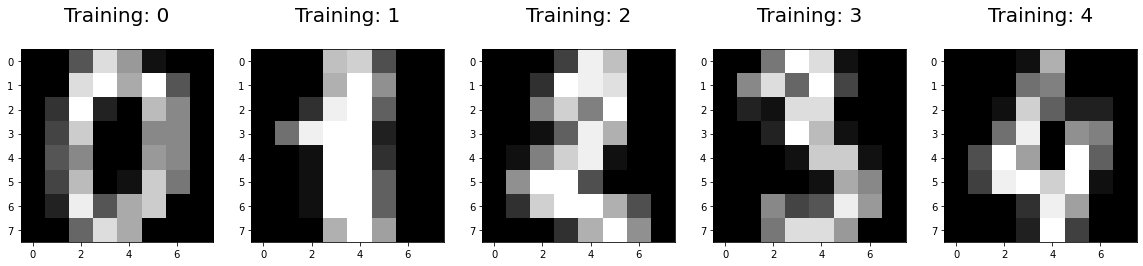

In [4]:
# посмотрим что за цифры
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
a= np.array([[1,2], [3,4]])
a.flatten()

array([1, 2, 3, 4])

In [6]:
#разделим на обучающую/тестовую выборку
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

Каждая цифра представлена матрицей черного белого цвета от 0 до 255. Далее матрица растянута в один вектор, так что 1 пиксель представляет 1 признак в объекте картинки. 

Для обучения используем модель из библиотеки sklearn - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Тут поддержаны все необходимые типы обучения и гиперпараметры. 

Обучим модель и замерим время обучения. 

In [7]:
# сравните с другим методом обучения многоклассовой задачи- ovr
log_reg = LogisticRegression(penalty='none', multi_class='ovr', max_iter=1000)
a = time.time()
log_reg.fit(x_train, y_train)
b = time.time()
print('Sklearn training time: ', (b-a)*1000)

Sklearn training time:  439.29028511047363


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# предсказания
predictions = log_reg.predict(x_test)
accuracy_result = log_reg.score(x_test, y_test)
print('Sklearn implementation accuracy: ', accuracy_result)

Sklearn implementation accuracy:  0.8888888888888888


In [9]:
# рассмотрим те объекты где модель ответила верно, а где ошиблась
index = 0
wrong_examples, true_examples  = [], []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        wrong_examples.append(index)
    else:
        true_examples.append(index)
    index +=1    

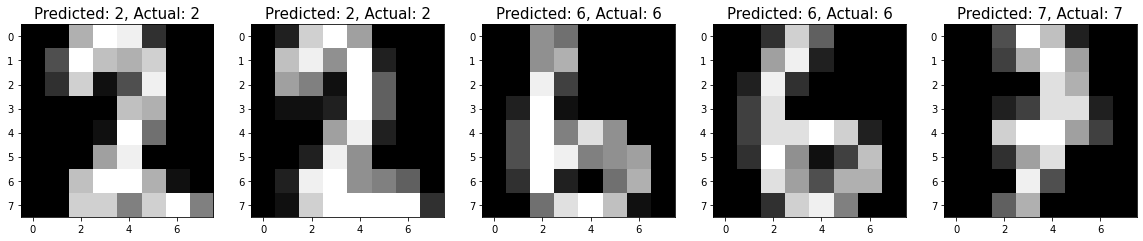

In [10]:
plt.figure(figsize=(20,4))
for plot_index, true_index in enumerate(true_examples[0:5]):
    plt.subplot(1, 5, plot_index + 1)
    plt.imshow(np.reshape(x_test[true_index], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[true_index], y_test[true_index]), fontsize = 15)

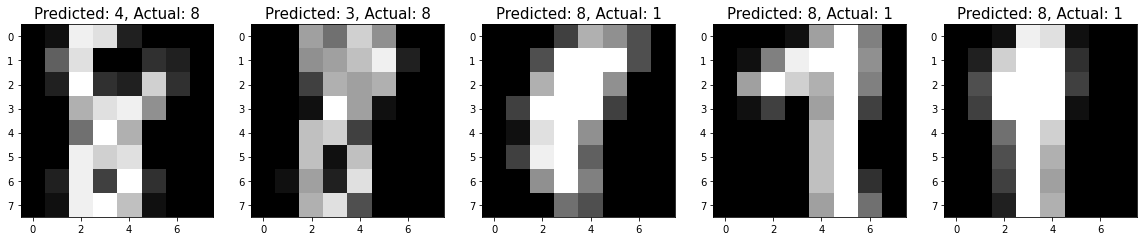

In [11]:
# посмотрим где модель ошиблась 
plt.figure(figsize=(20,4))
for plot_index, bad_index in enumerate(wrong_examples[0:5]):
    plt.subplot(1, 5, plot_index + 1)
    plt.imshow(np.reshape(x_test[bad_index], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[bad_index], y_test[bad_index]), fontsize = 15)

### Text classification

In [12]:
from sklearn.datasets import fetch_20newsgroups

# можем ограничить список классов для нашей задачи
# categories = ['alt.atheism', 'soc.religion.christian']
letter_data = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

In [13]:
set(letter_data.target_names)

{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [14]:
print("\n".join(letter_data.data[0].split("\n")[:20]))
print()
print(letter_data.target_names[letter_data.target[0]])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----




rec.autos


In [15]:
x_train, x_test, y_train, y_test = train_test_split(letter_data['data'], 
                                                    letter_data['target'], 
                                                    test_size=0.25, random_state=42)

Для представления списков текста в виде матрицы объекты признаки, воспользуемся простым методом векторизации - CountVectorizer
Алгоритм формирования векторного представления такой:

1) Собираем множество слов во всем датасете. 
2) Каждый текст представляем в виде вектора, где каждый индекс - это слово из собранного множества, а значение - количество данного слова в одном тексте. Длина вектора == мощность множества. 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
# метод fit_transform представляет собой сбор множества слов датасет и последующее преобразование выборки
X_train_counts = count_vect.fit_transform(x_train)
# метод transform строит вектора по построенному множеству
X_test_counts = count_vect.transform(x_test)
X_train_counts.shape, X_test_counts.shape

((8485, 115058), (2829, 115058))

In [17]:
log_reg = LogisticRegression(penalty='none', multi_class='multinomial')
a = time.time()
log_reg.fit(X_train_counts, y_train)
b = time.time()
print('Sklearn training time: ', (b-a)*1000)

Sklearn training time:  17801.318883895874


In [22]:
from collections import Counter

Counter(y_test)

Counter({4: 157,
         2: 142,
         6: 137,
         16: 150,
         10: 136,
         18: 137,
         5: 136,
         14: 152,
         7: 164,
         15: 150,
         3: 145,
         11: 156,
         12: 144,
         13: 145,
         9: 141,
         17: 135,
         19: 92,
         1: 138,
         0: 117,
         8: 155})

In [18]:
predictions = log_reg.predict(X_test_counts)
accuracy_result = log_reg.score(X_test_counts, y_test)
print('Sklearn implementation accuracy: ', accuracy_result)

Sklearn implementation accuracy:  0.8536585365853658


Для анализа ошибок посмотрим на каких примерах ошиблась наша модель.

In [19]:
index = 0
wrong_examples, true_examples  = [], []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        wrong_examples.append(index)
    else:
        true_examples.append(index)
    index +=1    

In [20]:
for idx in wrong_examples[:5]:
    print('True: ', letter_data.target_names[y_test[idx]])
    print('Predicted: ', letter_data.target_names[predictions[idx]])
    print(x_test[idx][:300])
    print("###################################################")

True:  comp.sys.mac.hardware
Predicted:  comp.sys.ibm.pc.hardware
From: rrn@po.CWRU.Edu (Robert R. Novitskey)
Subject: CYCLONE AND TEMPEST?????
Article-I.D.: usenet.1pskav$qtu
Reply-To: rrn@po.CWRU.Edu (Robert R. Novitskey)
Organization: Case Western Reserve University, Cleveland, OH (USA)
Lines: 10
NNTP-Posting-Host: thor.ins.cwru.edu


Could someone please post 
###################################################
True:  comp.sys.mac.hardware
Predicted:  rec.autos
Organization: Penn State University
From: <ACM108@psuvm.psu.edu>
Subject: Daystar Turbo 040 Opinions?
Lines: 6

I'm thinking about upgrading my 030 50MHz to the 040 33version.  Has anyone
had any experience with the accelerator, and if so - what do you think?
Any problems, what are the speedometer r
###################################################
True:  soc.religion.christian
Predicted:  sci.med
From: sml@rpsyc.nott.ac.uk (Steve Lang)
Subject: Re: The arrogance of Christians
Organization: Nottingham University
Lines: 60


### Практикум (5 баллов)

Кого бы вы не пустили на Титаник?

1) Скачайте датасет Titanic с Kaggle.
    * https://www.kaggle.com/competitions/titanic


2) Отделите валидационную выборку от обучающей для оценки вашего алгоритма оффлайн.
    * Вы можете проводить свою оценку на кросс-валидации


2) Проведите стандартизацию, кодирование категориальных признаков, очистите выбросы и тд.
    * Посмотрите ноутбуки 1-3.3 из папки Работа с признаками, как примеры обработки данных


3) Обучите логистическую регрессию из sklearn на трейне и оцените на валидации.
    * https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html


4) Рассчитайте accuracy на тестовой выборке, постройте ROC кривую для интегральной оценке по порогам. 
    * **Ожидаемое качество по accuracy ~80-90%.**


5) Каков признаковый портрет затонувшего человека?
    * Визуализируйте графиками ваш анализ


5) Загрузите ваше решение в Kaggle


**Для зачета -- загруженное решение на Каггл (скрин из личного кабинета) и признаковый портрет затонувшего человека (графики и статистики описывающие уточнувшего человека).**

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
def preprocess_data(df):
    df = df.copy()
    
    df['Age'] = df['Age'].fillna(df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))
    df['Fare'] = df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'))
    df['Embarked'] = df['Embarked'].fillna('S')
    
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    df['FamilyType'] = pd.cut(df['FamilySize'], 
                             bins=[0, 1, 4, float('inf')],
                             labels=['Single', 'Small', 'Large'])
    
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                     'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'Mid-High', 'High'])
    
    df['AgeBin'] = pd.cut(df['Age'], 
                         bins=[0, 12, 20, 30, 40, 50, 60, float('inf')],
                         labels=['Child', 'Teen', 'Young', 'Adult', 'Middle', 'Senior', 'Elderly'])
    
    df['HasCabin'] = (~df['Cabin'].isna()).astype(int)
    df['CabinDeck'] = df['Cabin'].str[0].fillna('U')
    
    df['Age*Class'] = df['Age'] * df['Pclass']
    df['Fare*Class'] = df['Fare'] * df['Pclass']
    
    categorical_features = ['Title', 'Embarked', 'Sex', 'FamilyType', 'AgeBin', 'FareBin', 'CabinDeck']
    df = pd.get_dummies(df, columns=categorical_features)
    
    return df

In [22]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_processed = preprocess_data(train_data)
test_processed = preprocess_data(test_data)

numeric_features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 
                   'Age*Class', 'Fare*Class', 'HasCabin']

feature_cols = [col for col in train_processed.columns 
               if col not in ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin']]

X = train_processed[feature_cols]
y = train_processed['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                 test_size=0.2, 
                                                 random_state=42, 
                                                 stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [23]:
model = LogisticRegression(
    C=0.1,  
    class_weight='balanced', 
    max_iter=1000,
    random_state=42
)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')


feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': np.abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(15)

Validation Accuracy: 0.8101


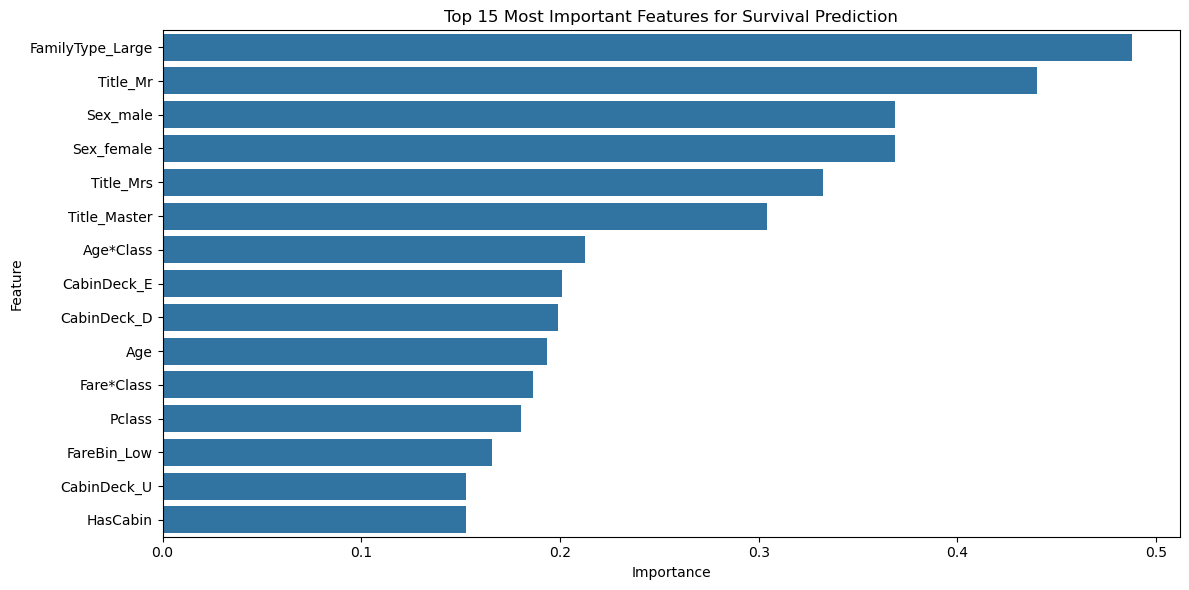

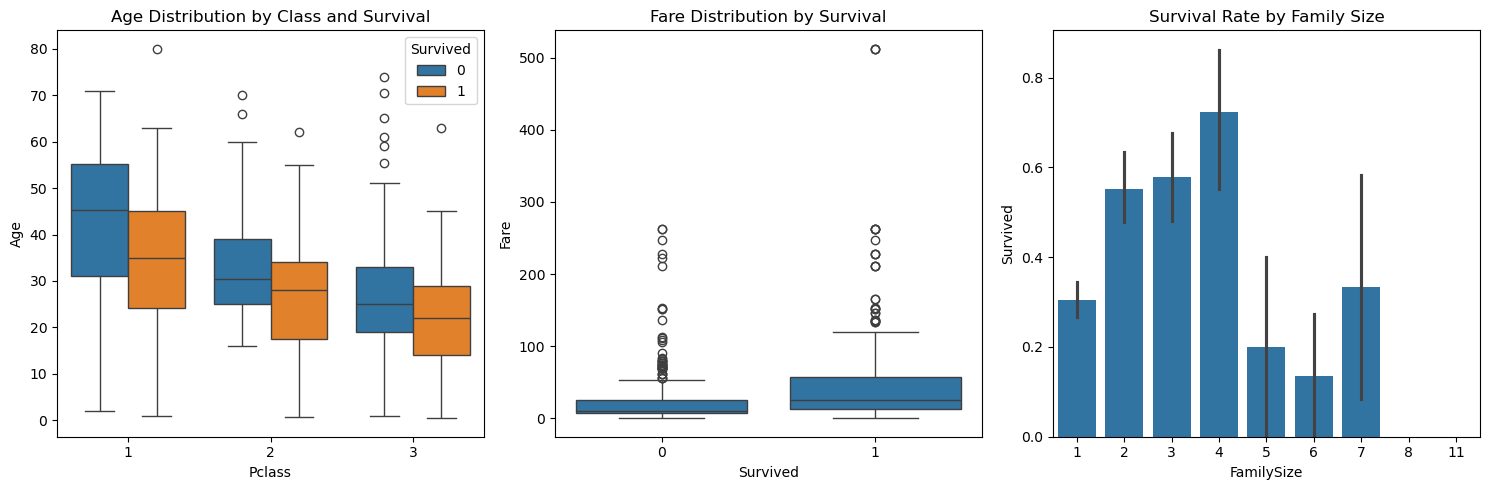

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 15 Most Important Features for Survival Prediction')
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_data)
plt.title('Age Distribution by Class and Survival')


plt.subplot(1, 3, 2)
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title('Fare Distribution by Survival')


plt.subplot(1, 3, 3)
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=train_data)
plt.title('Survival Rate by Family Size')

plt.tight_layout()
plt.show()

In [36]:
for col in feature_cols:
    if col not in test_processed.columns:
        test_processed[col] = 0

X_test = test_processed[feature_cols]
X_test_scaled = scaler.transform(X_test)

test_predictions = model.predict(X_test_scaled)

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('titanic_submission.csv', index=False)

print("Submission Preview:")
print(submission.head())
print("\nSubmission Info:")
print(f"Total predictions: {len(submission)}")
print(f"Survival rate in predictions: {submission['Survived'].mean():.2%}")

Submission Preview:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Submission Info:
Total predictions: 418
Survival rate in predictions: 44.98%
